<a href="https://colab.research.google.com/github/MahiraPutri149/DataMining-MarketBasketAnalysis/blob/main/Data_Mining_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AlfaIndo**
AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Tangerang, Surabaya, dan Medan. Anda adalah seorang Data Analyst yang bekerja di kantor pusat AlfaIndo di Jakarta. Pasca masa pandemi Toko AlfaIndo cabang UIN Ciputat mengalami penurunan laba yang signifikan. Anda ditugaskan oleh pimpinan untuk membantu toko ALfaIndo cabang UIN Ciputat untuk bangkit dari keterpurukannya.

In [ ]:
# import modul yang akan digunakan
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import MinMaxScaler
from mlxtend.frequent_patterns import apriori, association_rules
import re
import networkx as nx
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
import tau_unsup as tau

sns.set(style="ticks", color_codes=True)
random_state = 99

--2023-10-07 11:40:23--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17781 (17K) [text/plain]
Saving to: ‘tau_unsup.py’

tau_unsup.py        100%[===================>]  17.36K  --.-KB/s    in 0.004s  

2023-10-07 11:40:24 (4.32 MB/s) - ‘tau_unsup.py’ saved [17781/17781]



In [ ]:
# Warning install "mlxtend" module first. Jalankan cell ini Hanya jika menggunakan Google Colaboratory:
# Jika menggunakan Jupyter notebook secara lokal (e.g. Anaconda/WinPython) silahkan install lewat terminal (e.g. command prompt)
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend
except:
    print("Running the code locally, make sure to install required modules.")#IN_COLAB = False

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.10/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline
plt.style.use('bmh'); sns.set()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/MahiraPutri149/DataMining-MarketBasketAnalysis/main/data.csv")
df.shape

(56, 7)

In [ ]:
df.ffill(inplace=True)

In [ ]:
# Kita akan cek apakah ada missing values dari data tersebut.
df.isnull().sum()

ID Transaksi    0
Tanggal         0
Konsumen        0
ID Produk       0
Nama Produk     0
Merek           0
Jumlah          0
dtype: int64

Terlihat bahwa tidak terdapat missing value dari data. Berikutnya akan diperiksa apakah terdapat duplikasi data.

In [ ]:
df.duplicated().sum()

0

Dari output di atas terlihat bahwa tidak terdapat duplikasi data

In [ ]:
# mengubah type data
df['ID Transaksi'] = df['ID Transaksi'].astype('int64')
df['Konsumen'] = df['Konsumen'].astype('category')
df['ID Produk'] = df['ID Produk'].astype('category')
df['Nama Produk'] = df['Nama Produk'].astype('category')
df['Merek'] = df['Merek'].astype('category')
df['Jumlah'] = df['Jumlah'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID Transaksi  56 non-null     int64   
 1   Tanggal       56 non-null     object  
 2   Konsumen      56 non-null     category
 3   ID Produk     56 non-null     category
 4   Nama Produk   56 non-null     category
 5   Merek         56 non-null     category
 6   Jumlah        56 non-null     int64   
dtypes: category(4), int64(2), object(1)
memory usage: 3.2+ KB


In [ ]:
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,7/1/2022 0:00,Mr. A,1,Roti,Sri Roti,2
1,1,7/1/2022 0:00,Mr. A,2,Air Minum,Aquos,1
2,1,7/1/2022 0:00,Mr. A,11,Mie Instan,Indomi,2
3,1,7/1/2022 0:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1
5,2,7/1/2022 0:00,Mr. B,6,Snack,Chiki,2
6,2,7/1/2022 0:00,Mr. B,3,Roti,Prambanan,1
7,2,7/1/2022 0:00,Mr. B,5,Shampoo,Clean,1
8,3,7/2/2022 0:00,Mr. C,4,Sabun,Lifboy,1
9,3,7/2/2022 0:00,Mr. C,5,Shampoo,Clean,1


# Visualisasi

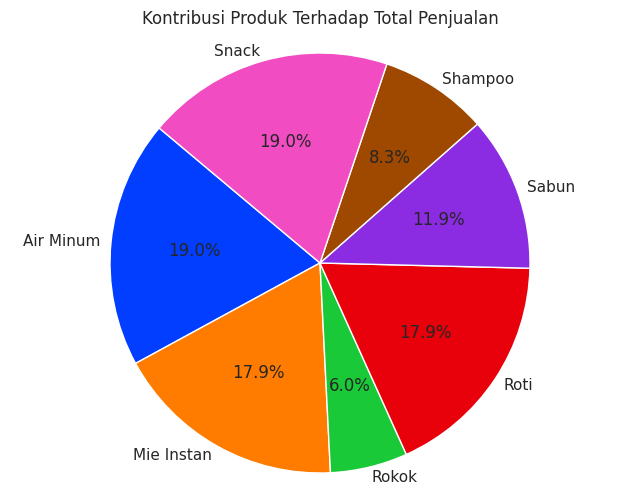

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Mengelompokkan data berdasarkan Nama Produk dan menghitung total penjualan
df_grouped = df.groupby('Nama Produk')['Jumlah'].sum().reset_index()

custom_palette = sns.color_palette("bright", len(df_grouped))

# Membuat pie chart dengan palet warna kustom dan latar belakang lavender
plt.figure(figsize=(8, 6))
plt.pie(df_grouped['Jumlah'], labels=df_grouped['Nama Produk'], autopct='%1.1f%%', startangle=140,
        colors=custom_palette, labeldistance=1.05)
plt.title('Kontribusi Produk Terhadap Total Penjualan')
plt.axis('equal')  # Agar pie chart terlihat seperti lingkaran
plt.show()

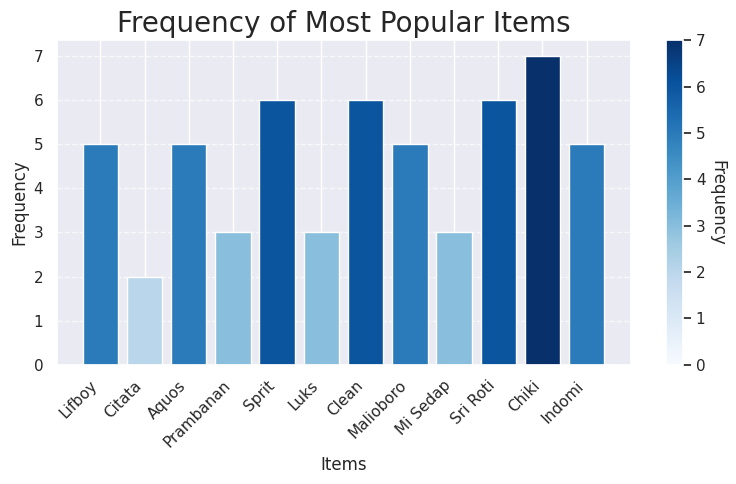

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (8, 5)

# Calculate the value counts for each 'Merek'
merek_counts = df['Merek'].value_counts()

# Shuffle the index to randomize the order
shuffled_index = np.random.permutation(merek_counts.index)

# Reorder the value counts based on shuffled index
shuffled_merek_counts = merek_counts[shuffled_index]

# Create a color map for the heatmap-like effect, with darker colors for higher frequency
max_freq = shuffled_merek_counts.max()
heatmap_colors = plt.cm.get_cmap('Blues')(shuffled_merek_counts / max_freq)

# Plot a bar chart with heatmap-like colors
plt.bar(range(len(shuffled_merek_counts)), shuffled_merek_counts, color=heatmap_colors)

plt.title('Frequency of Most Popular Items', fontsize=20)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(range(len(shuffled_merek_counts)), shuffled_merek_counts.index, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a color bar for the heatmap effect
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=max_freq))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Frequency', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

karena produk dengan merek Luks, Mi sedap, Prambanan, dan Citata cenderung sedikit pembeli, kami menyarankan untuk memberikan promo dan juga menata produk yang laku agar berdekatan dengan produk yang kurang laku sehingga produk yang tidak laku mempunyai peluang lebih besar untuk dibeli.

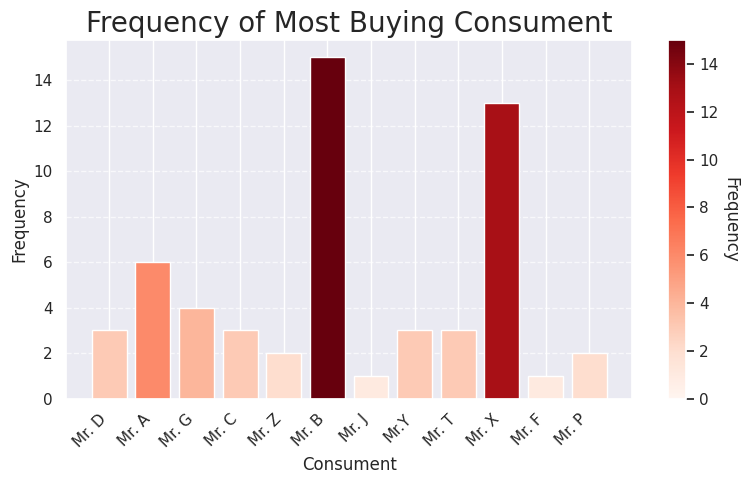

In [ ]:
# looking at the frequency of most buying consument
plt.rcParams['figure.figsize'] = (8, 5)

# Calculate the value counts for each 'Merek'
consument_counts = df['Konsumen'].value_counts()

# Shuffle the index to randomize the order
shuffled_index = np.random.permutation(consument_counts.index)

# Reorder the value counts based on shuffled index
shuffled_consument_counts = consument_counts[shuffled_index]

# Create a color map for the heatmap-like effect, with darker colors for higher frequency
max_freq = shuffled_consument_counts.max()
heatmap_colors = plt.cm.get_cmap('Reds')(shuffled_consument_counts / max_freq)

# Plot a bar chart with heatmap-like colors
plt.bar(range(len(shuffled_consument_counts)), shuffled_consument_counts, color=heatmap_colors)

plt.title('Frequency of Most Buying Consument', fontsize=20)
plt.xlabel('Consument')
plt.ylabel('Frequency')
plt.xticks(range(len(shuffled_consument_counts)), shuffled_consument_counts.index, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a color bar for the heatmap effect
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=max_freq))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Frequency', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

Karena konsumen dengan jumlah transaksi terbanyak dilakukan oleh Mr. B dan Mr. x , kita dapat memberikan sebuah rewards atau bonus karena telah setia berbelanja di toko AlfaIndo dalam jumlah yang tidak sedikit dan kita dapat mempublikasikan pemberian rewards tersebut supaya konsumen yang lain tertarik untuk memperoleh rewards juga sehingga hal ini menjadi keuntungan bagi toko AlfaIndo.

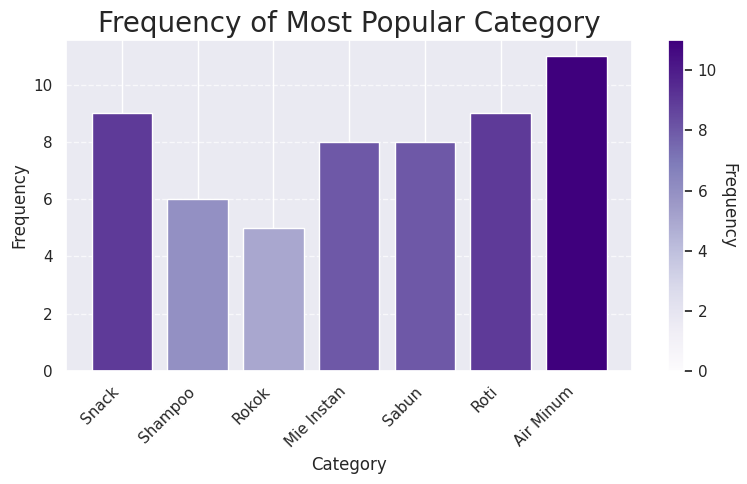

In [ ]:
# looking at the frequency of most popular category
plt.rcParams['figure.figsize'] = (8, 5)

# Calculate the value counts for each 'Merek'
itemset_counts = df['Nama Produk'].value_counts()

# Shuffle the index to randomize the order
shuffled_index = np.random.permutation(itemset_counts.index)

# Reorder the value counts based on shuffled index
shuffled_itemset_counts = itemset_counts[shuffled_index]

# Create a color map for the heatmap-like effect, with darker colors for higher frequency
max_freq = shuffled_itemset_counts.max()
heatmap_colors = plt.cm.get_cmap('Purples')(shuffled_itemset_counts / max_freq)

# Plot a bar chart with heatmap-like colors
plt.bar(range(len(shuffled_itemset_counts)), shuffled_itemset_counts, color=heatmap_colors)

plt.title('Frequency of Most Popular Category', fontsize=20)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(range(len(shuffled_itemset_counts)), shuffled_itemset_counts.index, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a color bar for the heatmap effect
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=0, vmax=max_freq))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Frequency', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

Produk paling banyak dijual adalah air minum, dan paling sedikit adalah rokok. Maka naikkan harga Air minum sedikit dan turunkan harga rokok, dan berikan promo untuk setiap pembelian air minum, diskon harga rokok.

## Market Basket Analysis

In [ ]:
# melakukan grouping data dengan kolom ID Transaksi
df2 = df.groupby('ID Transaksi')
df2.first()

,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
ID Transaksi,,,,,,
1,7/1/2022 0:00,Mr. A,1,Roti,Sri Roti,2
2,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1
3,7/2/2022 0:00,Mr. C,4,Sabun,Lifboy,1
4,7/2/2022 0:00,Mr. B,1,Roti,Sri Roti,2
5,7/3/2022 0:00,Mr. A,6,Snack,Chiki,1
6,7/3/2022 0:00,Mr. D,11,Mie Instan,Indomi,2
7,7/4/2022 0:00,Mr. Z,10,Air Minum,Sprit,1
8,7/4/2022 0:00,Mr. B,6,Snack,Chiki,1
9,7/5/2022 0:00,Mr. X,1,Roti,Sri Roti,2


In [ ]:
# Filter transactions where 'Konsumen' is 'Mr. B'
transactions_mr_b = df[df['Konsumen'] == 'Mr. B']

# Print the filtered transactions
transactions_mr_b

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
4,2,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1
5,2,7/1/2022 0:00,Mr. B,6,Snack,Chiki,2
6,2,7/1/2022 0:00,Mr. B,3,Roti,Prambanan,1
7,2,7/1/2022 0:00,Mr. B,5,Shampoo,Clean,1
11,4,7/2/2022 0:00,Mr. B,1,Roti,Sri Roti,2
12,4,7/2/2022 0:00,Mr. B,10,Air Minum,Sprit,2
13,4,7/2/2022 0:00,Mr. B,8,Snack,Citata,3
14,4,7/2/2022 0:00,Mr. B,7,Sabun,Luks,1
15,4,7/2/2022 0:00,Mr. B,12,Mie Instan,Mi Sedap,2
23,8,7/4/2022 0:00,Mr. B,6,Snack,Chiki,1


In [ ]:
basket = df.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
# Jumlahkan, unstack, Null=0, index baris menggunakan Nomer Transaksi
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,3,0,2,0,0,0
2,1,0,0,1,0,1,2
3,0,0,1,0,1,1,0
4,2,2,0,2,1,0,3
5,2,0,0,0,0,0,1
6,0,2,0,0,1,1,0
7,1,0,1,0,0,0,0
8,0,3,0,0,1,1,1
9,1,2,1,2,1,0,2


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encode = basket.applymap(encode_units) # one-hot encoding
basket = basket_encode
basket

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1
6,0,1,0,0,1,1,0
7,1,0,1,0,0,0,0
8,0,1,0,0,1,1,1
9,1,1,1,1,1,0,1


In [ ]:
basket.iloc[0].sum()

3

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.25, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
3,0.500000,(Roti)
6,0.500000,(Snack)
4,0.444444,(Sabun)
7,0.444444,"(Roti, Air Minum)"
8,0.388889,"(Snack, Air Minum)"
1,0.333333,(Mie Instan)
5,0.333333,(Shampoo)
10,0.333333,"(Roti, Snack)"
13,0.333333,"(Roti, Snack, Air Minum)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='support', ascending=False, na_position='last', inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.500000,0.625000
1,(Air Minum),(Roti),0.611111,0.500000,0.444444,0.727273,1.454545,0.138889,1.833333,0.803571
2,(Snack),(Air Minum),0.500000,0.611111,0.388889,0.777778,1.272727,0.083333,1.750000,0.428571
3,(Air Minum),(Snack),0.611111,0.500000,0.388889,0.636364,1.272727,0.083333,1.375000,0.551020
8,"(Snack, Air Minum)",(Roti),0.388889,0.500000,0.333333,0.857143,1.714286,0.138889,3.500000,0.681818
11,(Air Minum),"(Roti, Snack)",0.611111,0.333333,0.333333,0.545455,1.636364,0.129630,1.466667,1.000000
10,(Snack),"(Roti, Air Minum)",0.500000,0.444444,0.333333,0.666667,1.500000,0.111111,1.666667,0.666667
9,(Roti),"(Snack, Air Minum)",0.500000,0.388889,0.333333,0.666667,1.714286,0.138889,1.833333,0.833333
7,"(Roti, Air Minum)",(Snack),0.444444,0.500000,0.333333,0.750000,1.500000,0.111111,2.000000,0.600000
6,"(Roti, Snack)",(Air Minum),0.333333,0.611111,0.333333,1.000000,1.636364,0.129630,inf,0.583333


Karena konsumen yang membeli roti cenderung membeli air minum juga, maka penempatan roti dan air minum sebaiknya diletakkan di tempat yang berjauhan agar konsumen bisa melihat produk yang lainnya dan tertarik untuk membeli

In [ ]:
rules.sort_values(by='support', ascending=True, na_position='last', inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(Snack),(Sabun),0.500000,0.444444,0.277778,0.555556,1.250000,0.055556,1.250000,0.400000
15,(Sabun),(Shampoo),0.444444,0.333333,0.277778,0.625000,1.875000,0.129630,1.777778,0.840000
14,(Shampoo),(Sabun),0.333333,0.444444,0.277778,0.833333,1.875000,0.129630,3.333333,0.700000
13,(Sabun),(Mie Instan),0.444444,0.333333,0.277778,0.625000,1.875000,0.129630,1.777778,0.840000
12,(Mie Instan),(Sabun),0.333333,0.444444,0.277778,0.833333,1.875000,0.129630,3.333333,0.700000
16,(Sabun),(Snack),0.444444,0.500000,0.277778,0.625000,1.250000,0.055556,1.333333,0.360000
4,(Roti),(Snack),0.500000,0.500000,0.333333,0.666667,1.333333,0.083333,1.500000,0.500000
5,(Snack),(Roti),0.500000,0.500000,0.333333,0.666667,1.333333,0.083333,1.500000,0.500000
6,"(Roti, Snack)",(Air Minum),0.333333,0.611111,0.333333,1.000000,1.636364,0.129630,inf,0.583333
7,"(Roti, Air Minum)",(Snack),0.444444,0.500000,0.333333,0.750000,1.500000,0.111111,2.000000,0.600000


1. Frekuensi "jika sabun terbeli maka shampoo terbeli" dan sebaliknya kecil. Hal ini menarik karena biasanya jika seseorang membeli sabun maka dia membeli shampoo dan sebaliknya. Kami memprediksi hal ini terjadi karena kurangnya jenis dan merek Shampoo dan sabun yang dijual. Orang-orang biasanya cenderung memilih-milih merek shampoo dan sabun yang ingin digunakan karena kecocokan masing-masing. Untuk itu, sebaiknya jenis dan merek shampoo serta sabun diperbanyak untuk meningkatkan penjualan.

2. Kasus menarik lainnya adalah kecilnya frekuensi "jika snack terbeli maka sabun terbeli" dan sebaliknya. Kita dapat membuat promo untuk setiap pembelian snack maka mendapatkan diskon untuk sabun sebesar sekian persen. Dan letakkan Snack sedekat mungkin dengan sabun. Karena konsumen yang membeli sabun untuk keperluan bulanan biasanya adalah ibu rumah tangga, dan biasanya ibu rumah tangga akan membawa anaknya ketika berbelanja. Maka selagi sang ibu sedang memilih milih sabun anaknya dapat mencuci mata dengan banyaknya variasi snack dan meminta kepada sang ibu untuk membelikannya.

# Kesimpulan dan Rekomendasi
## Kesimpulan :
- Produk yang paling laku dibeli oleh konsumen di toko AlfaIndo cabang UIN Ciputat adalah Air minum sedangkan produk yang kurang laku dibeli oleh konsumen adalah Rokok.


## Rekomendasi :
- Maka untuk meningkatkan penjualan rokok penempatannya dapat diletakkan di dekat kasir dan bisa juga menambahkan korek dalam barang yang dijual